In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
rand_seed = 41
teams_df = pd.read_csv('../data/interim/NBA_team_stats_1979-2024_clean.csv')

In [3]:
teams_df.head()

Unnamed: 0  Season Team   W   G   L     W%    FG%    2P%    3P%  ...  \
0           0    2015  GSW  73  82   9  0.890  0.487  0.528  0.416  ...   
1           1    1995  CHI  72  82  10  0.878  0.478  0.496  0.403  ...   
2           2    1996  CHI  69  82  13  0.841  0.473  0.499  0.373  ...   
3           3    2016  GSW  67  82  15  0.817  0.495  0.557  0.383  ...   
4           4    2015  SAS  67  82  15  0.817  0.484  0.515  0.375  ...   

       FTA/G      ORB/G      DRB/G      TRB/G      AST/G     STL/G     BLK/G  \
0  21.829268   9.951220  36.243902  46.195122  28.939024  8.402439  6.073171   
1  24.439024  15.207317  29.402439  44.609756  24.792683  9.085366  4.207317   
2  22.536585  15.060976  30.012195  45.073171  26.121951  8.731707  4.048780   
3  22.560976   9.390244  35.036585  44.426829  30.378049  9.573171  6.768293   
4  20.390244   9.390244  34.524390  43.914634  24.512195  8.256098  5.914634   

       TOV/G       PF/G       PTS/G  
0  15.182927  20.743902  114.890244  
1  14.329268  22.036585  105.182927  
2  13.524390  19.719512  103.146341  
3  14.768293  19.329268  115.890244  
4  13.060976  17.475610  103.536585  

[5 rows x 31 columns]

/opt/anaconda3/envs/nba-analytics/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


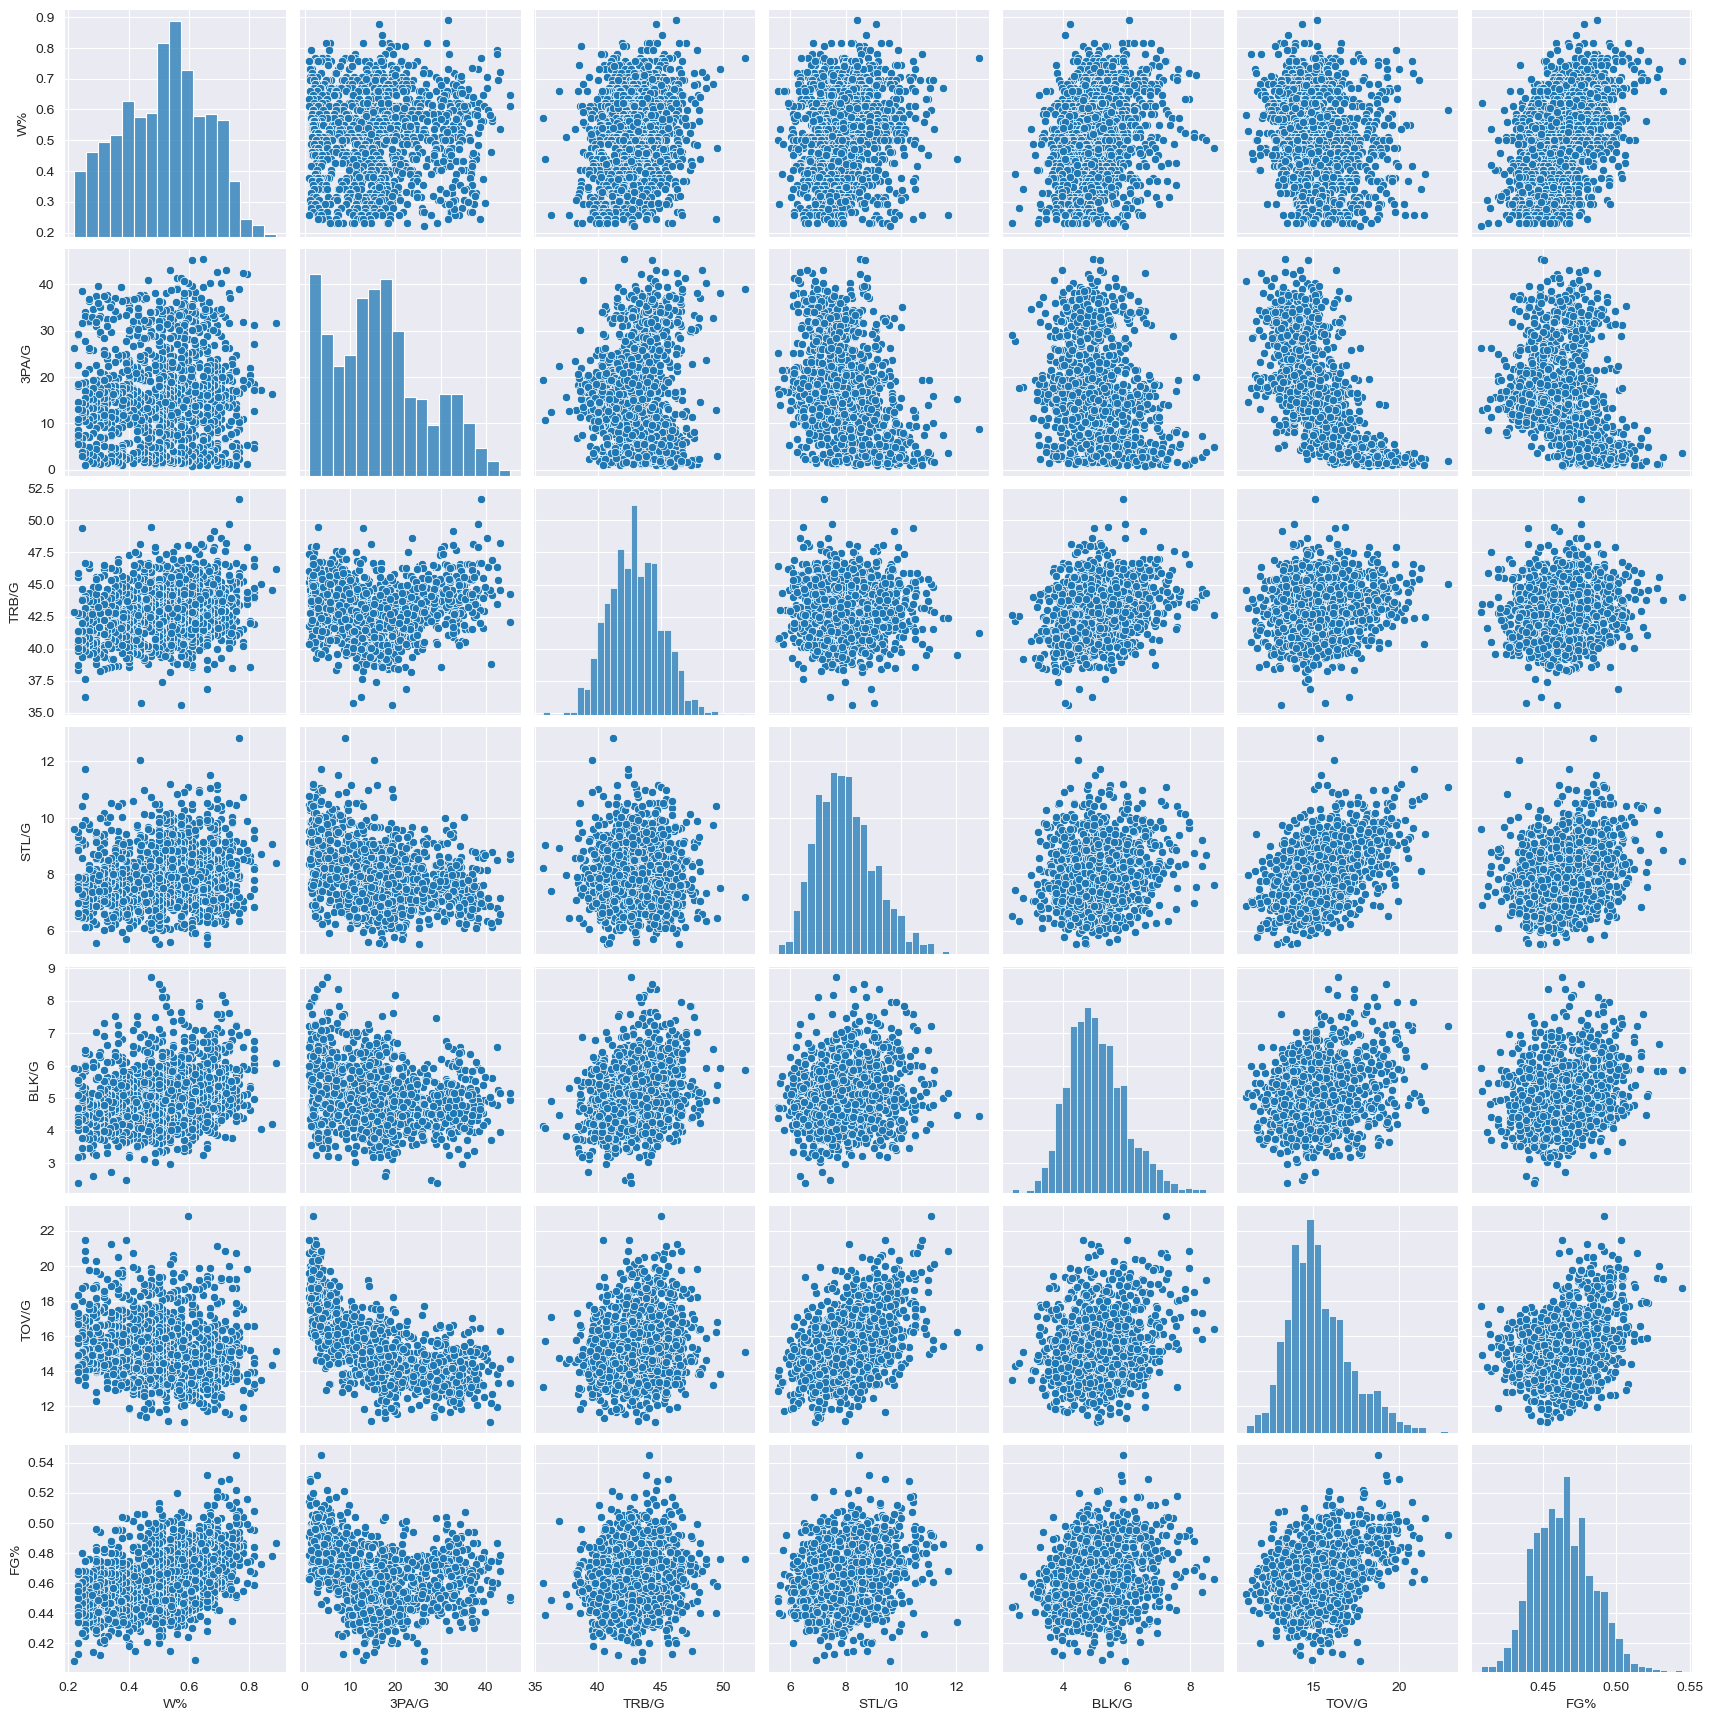

In [4]:
pplot_cols = ['W%', '3PA/G', 'TRB/G', 'STL/G', 'BLK/G', 'TOV/G', 'FG%']
sns.pairplot(teams_df[pplot_cols])

In [5]:
teams_df.drop(columns=['Team', 'Season']).corr()

Unnamed: 0         W         G         L        W%       FG%  \
Unnamed: 0    1.000000 -0.993405 -0.218824  0.889907 -0.960887 -0.448540   
W            -0.993405  1.000000  0.222467 -0.894812  0.967489  0.463229   
G            -0.218824  0.222467  1.000000  0.236190 -0.024578  0.182770   
L             0.889907 -0.894812  0.236190  1.000000 -0.975535 -0.377999   
W%           -0.960887  0.967489 -0.024578 -0.975535  1.000000  0.429047   
FG%          -0.448540  0.463229  0.182770 -0.377999  0.429047  1.000000   
2P%          -0.382068  0.372495  0.049024 -0.348811  0.366689  0.659980   
3P%          -0.171339  0.159798 -0.083050 -0.197298  0.184124 -0.297531   
FT%          -0.166041  0.161521  0.079641 -0.124517  0.144759  0.172791   
TS%          -0.488329  0.481542  0.056672 -0.453994  0.477719  0.625490   
eFG%         -0.434418  0.424380  0.027603 -0.410333  0.425264  0.551098   
MP/G          0.045162 -0.035366 -0.039274  0.017265 -0.024528 -0.115650   
FG/G         -0.201040  0.211292  0.173427 -0.131176  0.169996  0.777396   
FGA/G         0.054578 -0.051332  0.116312  0.104423 -0.086567  0.362637   
2P/G         -0.067867  0.091988  0.199466 -0.000344  0.045038  0.658379   
2PA/G         0.058655 -0.033150  0.174999  0.113176 -0.076133  0.422222   
3P/G         -0.074516  0.049517 -0.132152 -0.109868  0.080222 -0.263778   
3PA/G        -0.038977  0.012722 -0.137427 -0.075610  0.043446 -0.294313   
FT/G         -0.173771  0.191528  0.156478 -0.119238  0.160266  0.450120   
FTA/G        -0.128488  0.147501  0.133218 -0.086008  0.121363  0.402794   
ORB/G         0.061311 -0.040550  0.104816  0.088412 -0.066839  0.162130   
DRB/G        -0.259846  0.242352 -0.089675 -0.282612  0.269077 -0.000225   
TRB/G        -0.228811  0.229266  0.000805 -0.228137  0.233745  0.154347   
AST/G        -0.283538  0.293478  0.125189 -0.235178  0.266354  0.725821   
STL/G        -0.126681  0.135351  0.015239 -0.127924  0.133607  0.269219   
BLK/G        -0.220636  0.226870  0.013300 -0.220028  0.230603  0.208322   
TOV/G         0.187760 -0.170525  0.083705  0.208290 -0.193562  0.374115   
PF/G          0.139208 -0.119771  0.143732  0.185192 -0.157587  0.263854   
PTS/G        -0.271838  0.273934  0.135713 -0.210880  0.243280  0.691272   

                 2P%       3P%       FT%       TS%  ...     FTA/G     ORB/G  \
Unnamed: 0 -0.382068 -0.171339 -0.166041 -0.488329  ... -0.128488  0.061311   
W           0.372495  0.159798  0.161521  0.481542  ...  0.147501 -0.040550   
G           0.049024 -0.083050  0.079641  0.056672  ...  0.133218  0.104816   
L          -0.348811 -0.197298 -0.124517 -0.453994  ... -0.086008  0.088412   
W%          0.366689  0.184124  0.144759  0.477719  ...  0.121363 -0.066839   
FG%         0.659980 -0.297531  0.172791  0.625490  ...  0.402794  0.162130   
2P%         1.000000  0.119139  0.276754  0.925214  ... -0.103065 -0.368723   
3P%         0.119139  1.000000  0.151097  0.305214  ... -0.480698 -0.599603   
FT%         0.276754  0.151097  1.000000  0.435417  ... -0.150340 -0.288263   
TS%         0.925214  0.305214  0.435417  1.000000  ... -0.059813 -0.471815   
eFG%        0.945169  0.352940  0.311920  0.966291  ... -0.245304 -0.526433   
MP/G       -0.112655  0.039819 -0.014558 -0.089630  ... -0.002048 -0.025456   
FG/G        0.597411 -0.420916  0.211180  0.455678  ...  0.279235  0.337241   
FGA/G       0.371881 -0.378214  0.176831  0.189167  ...  0.090568  0.364440   
2P/G       -0.003294 -0.720854 -0.025561 -0.116467  ...  0.633256  0.723795   
2PA/G      -0.301058 -0.725996 -0.106030 -0.392365  ...  0.631738  0.806906   
3P/G        0.507139  0.650737  0.213276  0.545667  ... -0.647816 -0.725225   
3PA/G       0.496289  0.617520  0.195623  0.512552  ... -0.645722 -0.711750   
FT/G       -0.027442 -0.436854  0.145009  0.062764  ...  0.955702  0.526210   
FTA/G      -0.103065 -0.480698 -0.150340 -0.059813  ...  1.000000  0.609421   
ORB/G      -0.368723 -0.599603 -0.288263 -0.471815  ...  0.609421  1.000

In [6]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(teams_df.drop(columns=['Team', 'Season', 'W', 'G', 'L', 'W%', 'MP/G']))

In [7]:
pca = PCA()
pc_df = pca.fit_transform(scaled_df)
explained_variance = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(explained_variance)

<Axes: >

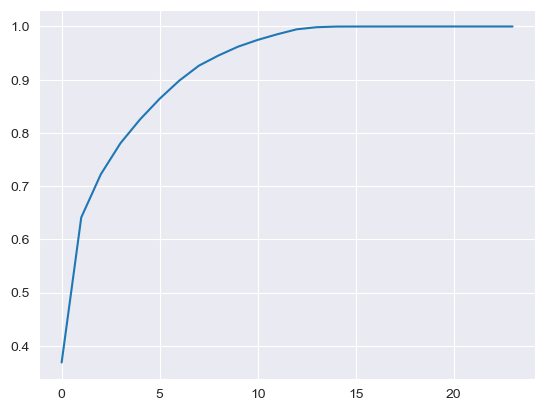

In [8]:
sns.lineplot(x=list(range(0, len(cum_exp_var))), y=cum_exp_var)

In [9]:
n_pcs = 10
pc_df = pd.DataFrame(pc_df)
pc_df = pc_df[list(range(0, n_pcs+1))]

In [10]:
pc_df

0         1         2         3         4         5         6   \
0    -3.218474  5.550743  0.291463  1.407921  1.348101 -0.273613  0.359571   
1     0.007699  1.188450 -0.480777  0.382823  0.716356 -0.656798  2.364449   
2    -0.536076  1.081297  0.331635  0.342493  0.702856 -1.555676  2.107785   
3    -2.653220  6.387029 -0.682221  1.028951  1.576891 -0.966485  0.383814   
4    -2.733493  2.490665 -0.521067  1.212739 -0.131080 -2.718339 -0.018177   
...        ...       ...       ...       ...       ...       ...       ...   
1195  0.653992 -2.513460 -0.349910 -1.097899  0.340664  0.626273 -0.681686   
1196  2.128810 -2.027788 -2.049841 -1.661093 -0.569783  0.082033 -1.725650   
1197  1.753080 -2.251773  0.192161 -3.581485  0.346875 -1.102184  0.917849   
1198  3.180551 -2.114332 -0.372613 -1.472537  0.902732  0.963748 -0.648702   
1199 -1.122161 -4.711995  2.680435  0.736684  2.739225  1.723606  0.431569   

            7         8         9         10  
0     0.353808  0.073270 -1.703752 -0.557864  
1    -1.311019 -0.587385 -0.862005  0.029509  
2    -1.638785 -0.186370 -0.233329 -0.292750  
3     1.687916  0.242014 -0.564492 -0.698362  
4     0.369816  0.826885  0.095317 -0.430202  
...        ...       ...       ...       ...  
1195 -0.420284 -0.563467 -0.416588 -1.300358  
1196  1.767247  0.064096 -0.113022 -0.192502  
1197  0.101066 -0.323728  0.005658 -0.898837  
1198  0.224612 -0.017320  0.118354 -0.183902  
1199  1.694226  0.578089  0.054099 -0.489017  

[1200 rows x 11 columns]

In [11]:
n_clusters = list(range(2, 11))
inertias = []
for n in n_clusters:
    model = KMeans(n_clusters=n, random_state=rand_seed, n_init='auto')
    model.fit(pc_df)
    inertias.append(model.inertia_)

<Axes: >

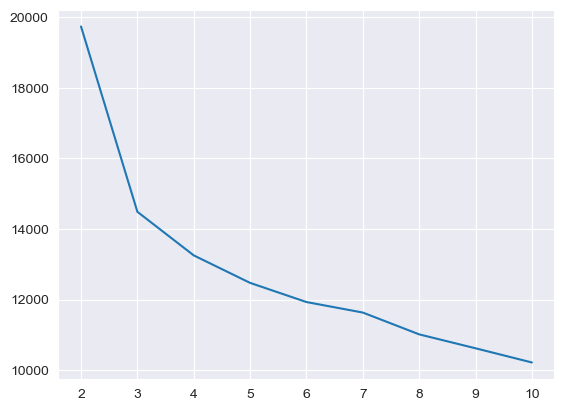

In [12]:
sns.lineplot(x=n_clusters, y=inertias)

In [13]:
n_clusters_kmeans = 3
palette = ['red', 'blue', 'green']
kmeans_clusterer = KMeans(n_clusters=n_clusters_kmeans, random_state=rand_seed, n_init='auto')
kmeans_clusterer.fit(pc_df)
kmeans_labels = kmeans_clusterer.labels_

In [14]:
teams_df['Kmeans cluster'] = kmeans_labels

<Axes: xlabel='W', ylabel='Density'>

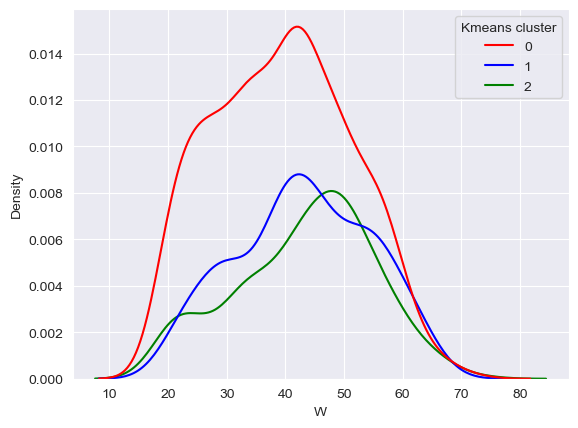

In [15]:
sns.kdeplot(teams_df, x='W', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='W', ylabel='Count'>

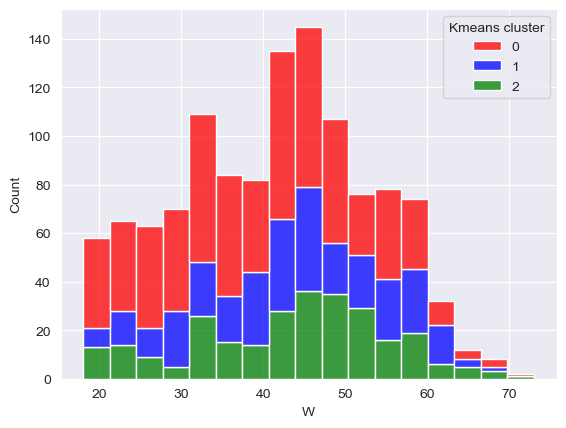

In [16]:
sns.histplot(teams_df, x='W', hue='Kmeans cluster', palette=palette, multiple='stack')

In [17]:
teams_df['Kmeans cluster'].value_counts()

Kmeans cluster
0    602
1    324
2    274
Name: count, dtype: int64

/opt/anaconda3/envs/nba-analytics/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


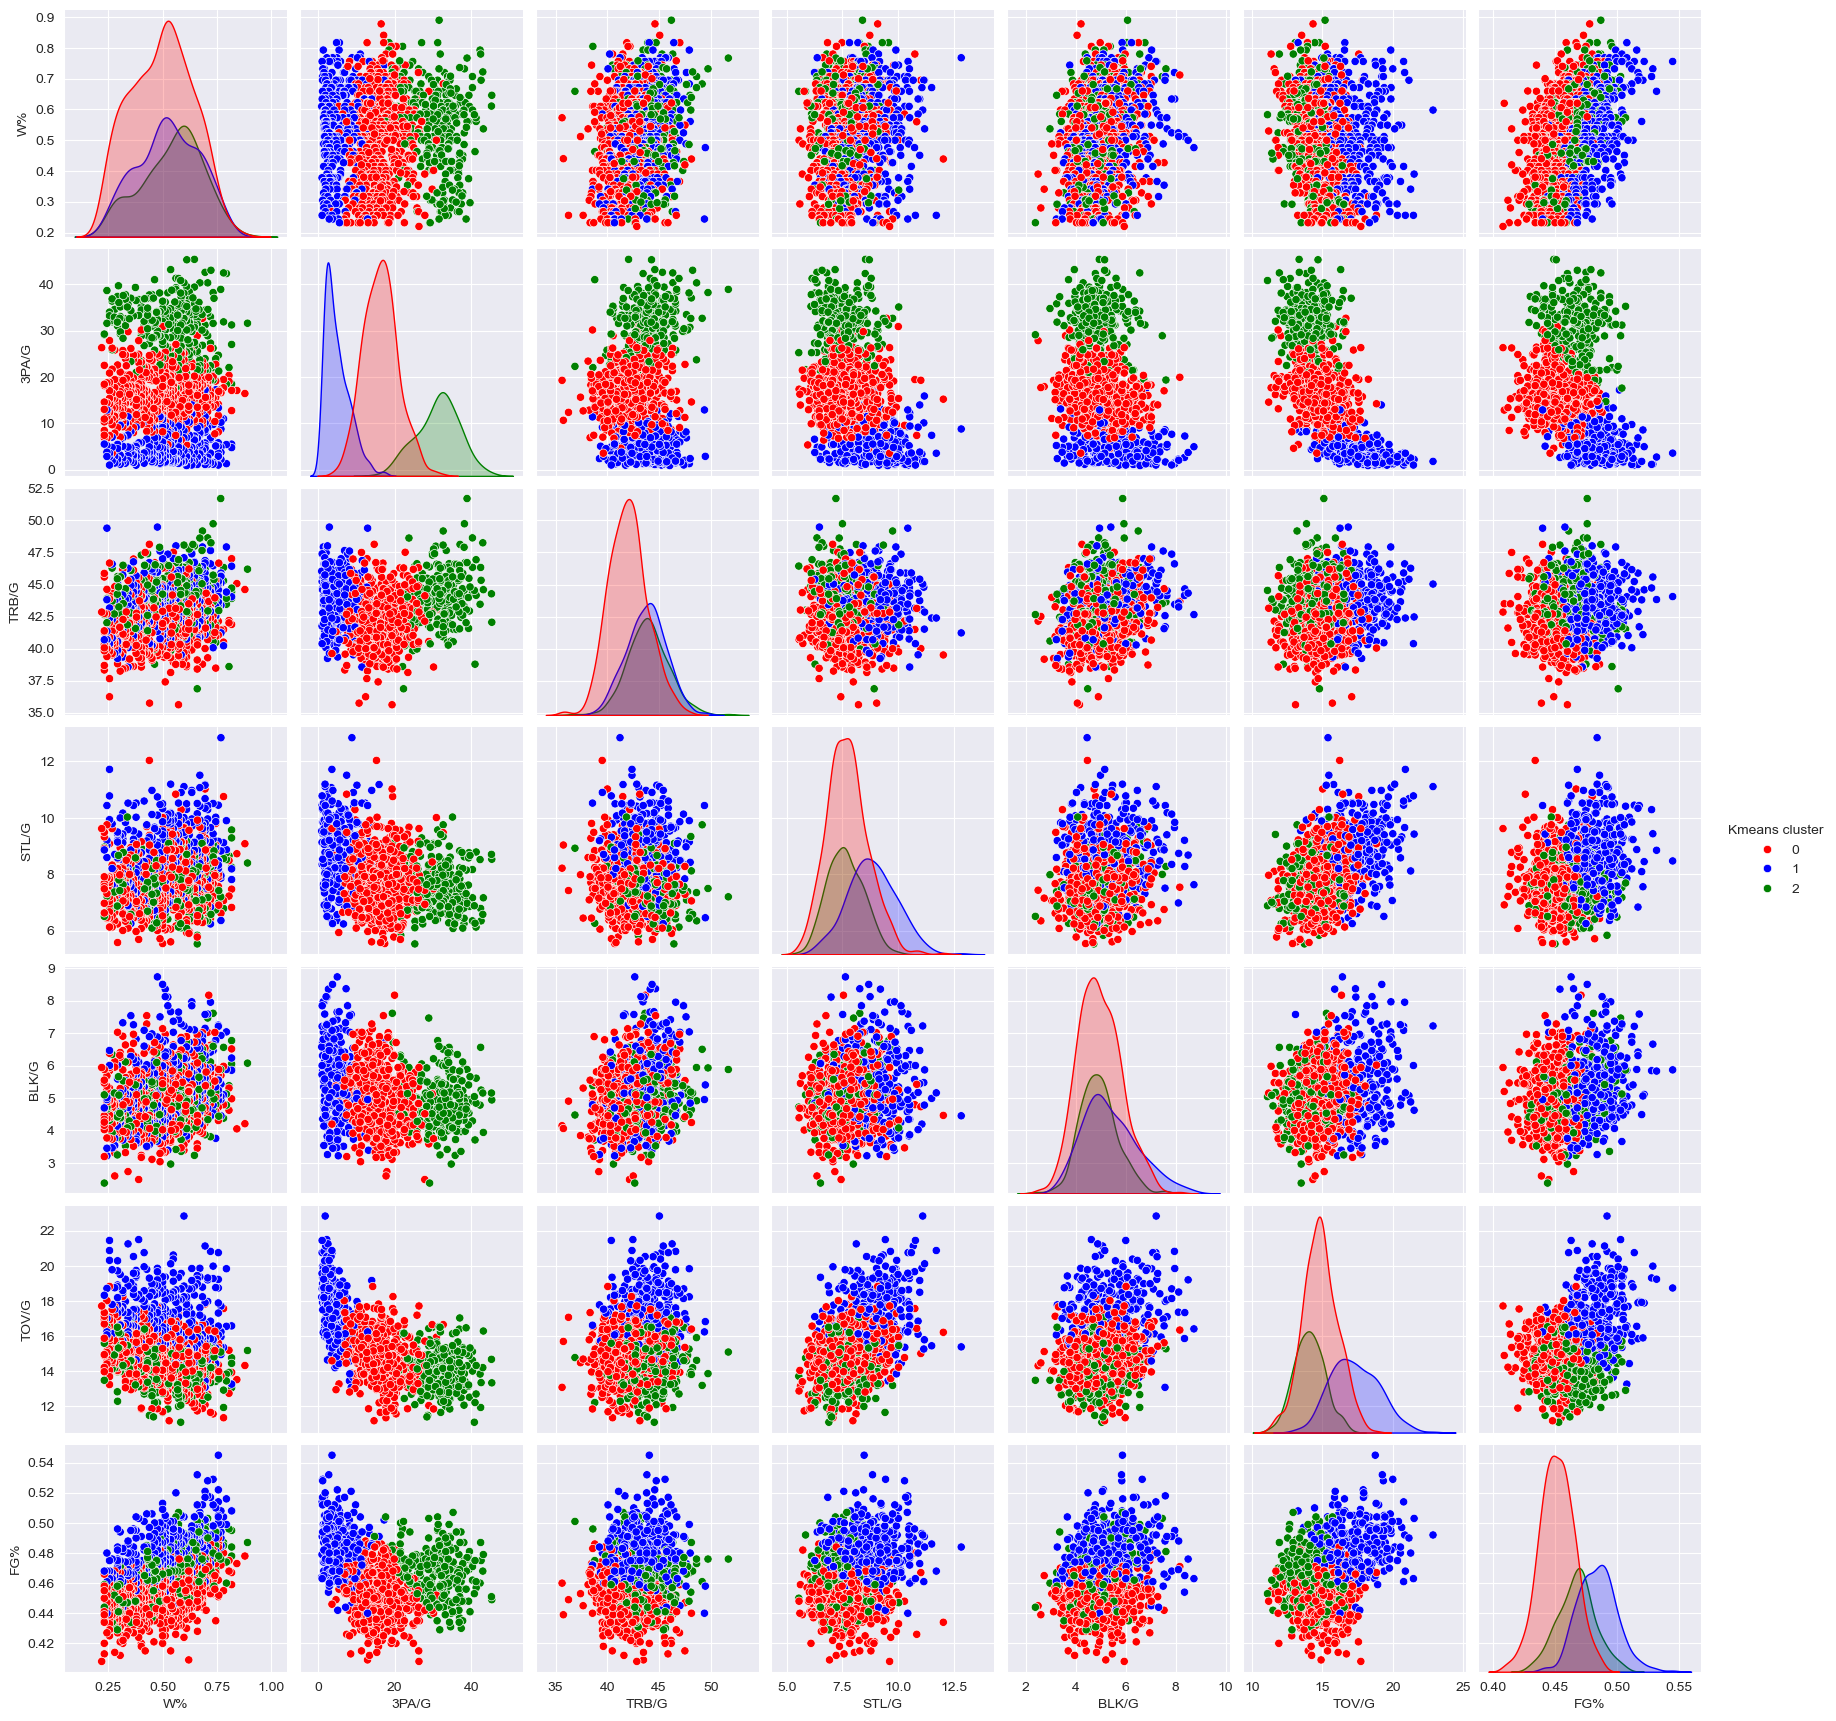

In [18]:
pplot_cols.append('Kmeans cluster')
sns.pairplot(teams_df[pplot_cols], hue='Kmeans cluster', palette=palette)

<Axes: xlabel='Season', ylabel='Count'>

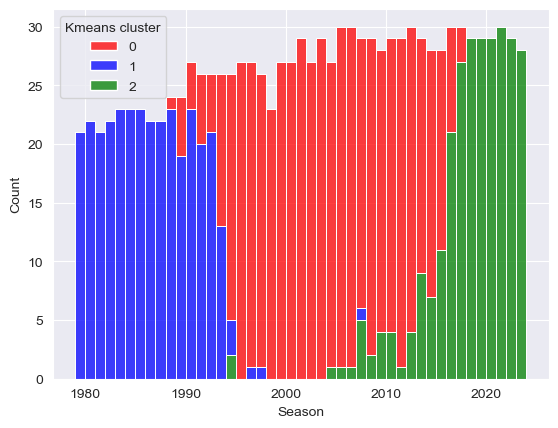

In [19]:
sns.histplot(teams_df, x='Season', hue='Kmeans cluster', multiple='stack', palette=palette, binwidth=1, binrange=(1979, 2024))

In [20]:
for x in [0, 1, 2]:
    print(f'Cluster {x}')
    print(teams_df[teams_df['Kmeans cluster'] == x]['Season'].value_counts())

Cluster 0
Season
2001    29
2003    29
2006    29
2005    29
2011    28
2000    27
2002    27
1995    27
2008    27
1999    27
2004    26
1996    26
2012    26
1997    25
2010    25
2009    24
2007    23
1998    23
1994    21
2014    21
2013    20
2015    17
1993    13
2016     9
1991     6
1989     5
1992     5
1990     4
2017     3
1988     1
Name: count, dtype: int64
Cluster 1
Season
1984    23
1990    23
1983    23
1988    23
1985    23
1987    22
1986    22
1982    22
1980    22
1979    21
1981    21
1992    21
1991    20
1989    19
1993    13
1994     3
1997     1
1996     1
2007     1
Name: count, dtype: int64
Cluster 2
Season
2021    30
2018    29
2020    29
2019    29
2022    29
2023    28
2017    27
2016    21
2015    11
2013     9
2014     7
2007     5
2010     4
2009     4
2012     4
1994     2
2008     2
2006     1
2004     1
2005     1
2011     1
Name: count, dtype: int64


In [21]:
cluster_names = {0: '1994-2015', 1: 'Pre-1994', 2: 'Post-2015'}
teams_df['Kmeans cluster'] = teams_df['Kmeans cluster'].apply(lambda x: cluster_names[x])

<Axes: xlabel='Season', ylabel='Count'>

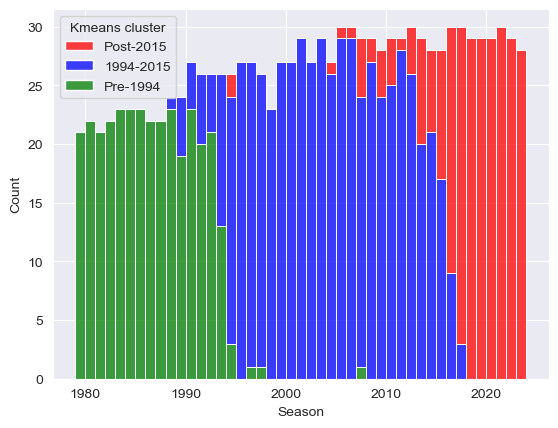

In [22]:
sns.histplot(teams_df, x='Season', hue='Kmeans cluster', multiple='stack', palette=palette, binwidth=1, binrange=(1979, 2024))

In [23]:
stats_pre1994 = teams_df[teams_df['Kmeans cluster']=='Pre-1994'].describe().iloc[1:3]
stats_1994_2015 = teams_df[teams_df['Kmeans cluster']=='1994-2015'].describe().iloc[1:3]
stats_post2015 = teams_df[teams_df['Kmeans cluster']=='Post-2015'].describe().iloc[1:3]
stats_all_eras = teams_df.describe().iloc[1:3]

In [24]:
stats_pre1994 - stats_all_eras

Unnamed: 0     Season         W         G         L        W%       FG%  \
mean  -39.509259 -16.229198  1.750062  1.514167 -0.235895  0.011641  0.020242   
std    -5.137823  -8.285765 -0.303278 -5.407325 -0.342442 -0.002108 -0.004496   

           2P%       3P%       FT%  ...     FTA/G     ORB/G     DRB/G  \
mean  0.001772 -0.050729 -0.000198  ...  3.443333  2.170811 -1.346222   
std  -0.010772  0.010123 -0.002336  ... -0.836255 -0.650924 -0.866851   

         TRB/G     AST/G     STL/G     BLK/G     TOV/G      PF/G     PTS/G  
mean  0.824589  2.304399  0.834653  0.327431  1.964848  2.341585  5.264954  
std  -0.227226 -0.657554  0.016787  0.165612 -0.137768 -0.372024 -2.706644  

[2 rows x 30 columns]

In [25]:
stats_1994_2015 - stats_all_eras

Unnamed: 0    Season         W         G         L        W%       FG%  \
mean   54.272425  1.547514 -1.844889 -0.455933  1.388956 -0.019226 -0.012445   
std    -3.174277 -5.937583 -0.086604  1.465112  0.308683 -0.000652 -0.006100   

           2P%       3P%       FT%  ...     FTA/G     ORB/G     DRB/G  \
mean -0.016303  0.015022 -0.006785  ... -0.660636 -0.270455 -0.631125   
std  -0.009996 -0.024248 -0.000867  ... -0.758898 -0.556836 -0.606509   

         TRB/G     AST/G     STL/G     BLK/G     TOV/G      PF/G     PTS/G  
mean -0.901579 -1.746655 -0.277097 -0.108244 -0.487097 -0.303353 -5.921592  
std  -0.231423 -0.849422 -0.147875 -0.065160 -0.578716 -0.581425 -3.316101  

[2 rows x 30 columns]

In [26]:
stats_post2015 - stats_all_eras

Unnamed: 0     Season         W         G         L        W%       FG%  \
mean  -72.521898  15.790718  1.983954 -0.788753 -2.772707  0.028476  0.003407   
std    -5.339983  -8.310881 -0.053965 -0.864546 -0.781393 -0.001889 -0.005160   

           2P%       3P%       FT%  ...     FTA/G     ORB/G     DRB/G  \
mean  0.033725  0.026982  0.015142  ... -2.620209 -1.972734  2.978514   
std  -0.004341 -0.029761 -0.000957  ... -1.101432 -0.875927 -0.631566   

         TRB/G     AST/G     STL/G     BLK/G     TOV/G      PF/G     PTS/G  
mean  1.005780  1.112631 -0.378158 -0.149360 -1.253206 -2.102391  6.784501  
std  -0.114053 -0.517147 -0.278307 -0.183455 -0.751356 -1.001496 -2.626293  

[2 rows x 30 columns]

<Axes: xlabel='2PA/G', ylabel='Density'>

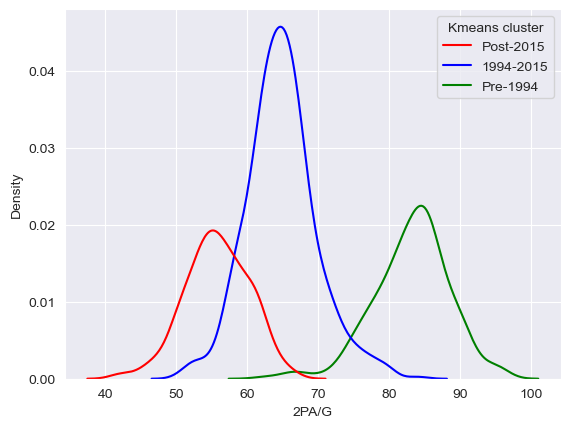

In [27]:
sns.kdeplot(teams_df, x='2PA/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='3PA/G', ylabel='Density'>

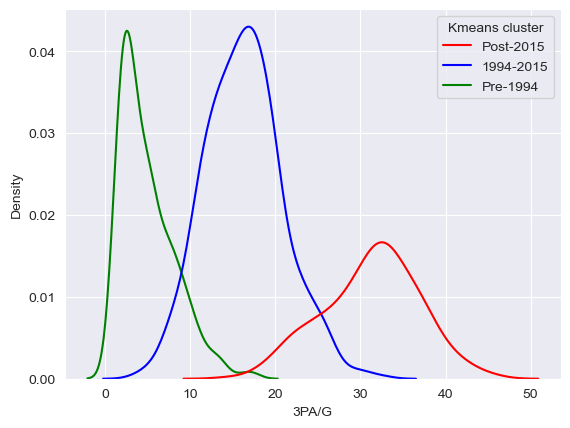

In [28]:
sns.kdeplot(teams_df, x='3PA/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='STL/G', ylabel='Density'>

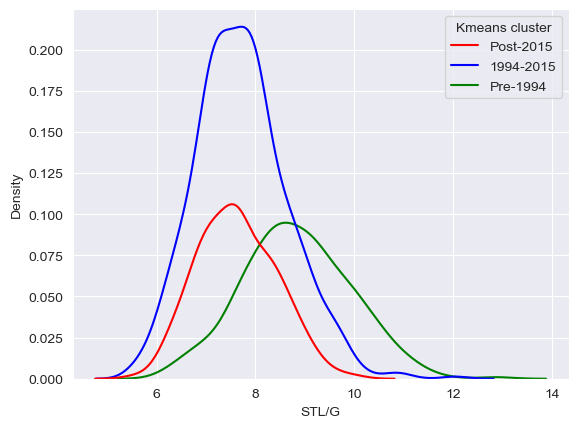

In [29]:
sns.kdeplot(teams_df, x='STL/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='BLK/G', ylabel='Density'>

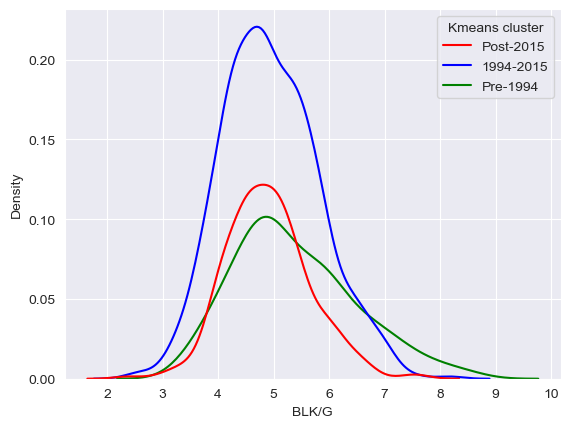

In [30]:
sns.kdeplot(teams_df, x='BLK/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='TOV/G', ylabel='Density'>

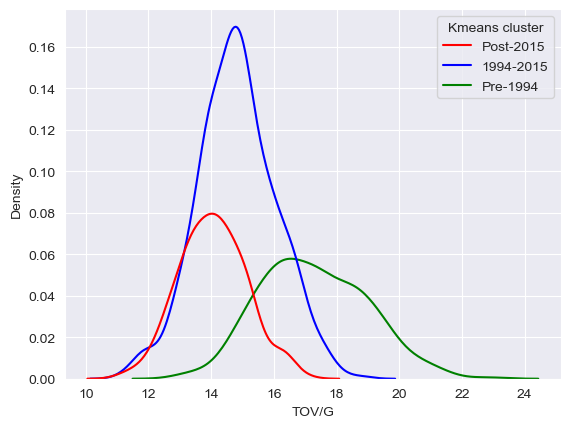

In [31]:
sns.kdeplot(teams_df, x='TOV/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='PTS/G', ylabel='Density'>

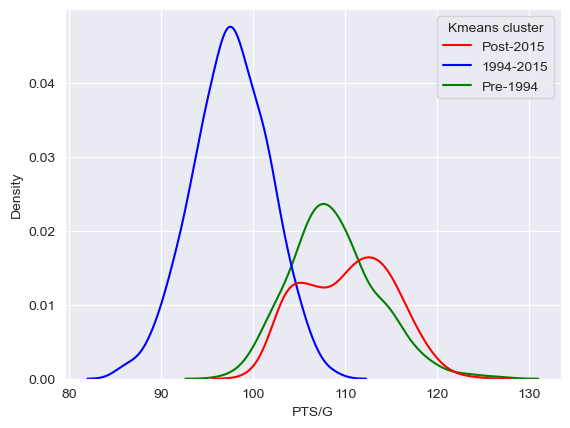

In [32]:
sns.kdeplot(teams_df, x='PTS/G', hue='Kmeans cluster', palette=palette)

<Axes: xlabel='PF/G', ylabel='Density'>

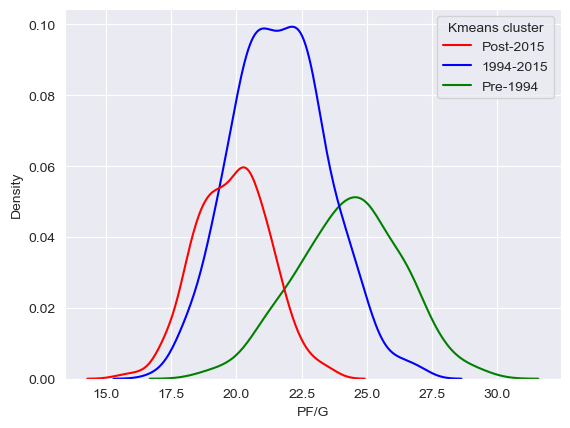

In [33]:
sns.kdeplot(teams_df, x='PF/G', hue='Kmeans cluster', palette=palette)